<div style="background-color:#2E87A4 ;color:#FDFDFD;padding:20px;border:1px solid #3184BB;text-align:center;">
<p><font size="12" color="#FDFDFD" face="Lora"><i>Loan Defaulter Prediction (Banking Domain)</i></font> </p>
</div>

# Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [3]:
df=pd.read_csv(r"C:\Users\61491\Desktop\Inn DS\DS_excel_sheets\credit_risk_dataset.csv")
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

# Data Cleaning

## Check for duplicates

In [4]:
df.duplicated().value_counts()

False    32416
True       165
dtype: int64

In [5]:
# Identify the existing duplicates

df[df.duplicated()]

person_age  person_income person_home_ownership  person_emp_length  \
15975          23          42000                  RENT                5.0   
15989          23          90000              MORTGAGE                7.0   
15995          24          48000              MORTGAGE                4.0   
16025          24          10000                  RENT                8.0   
16028          23         100000              MORTGAGE                7.0   
...           ...            ...                   ...                ...   
32010          42          39996              MORTGAGE                2.0   
32047          36         250000                  RENT                2.0   
32172          49         120000              MORTGAGE               12.0   
32259          39          40000                   OWN                4.0   
32279          43          11340                  RENT                4.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
15975            VENTURE          B       6000           9.99            0   
15989          EDUCATION          B       8000          10.36            0   
15995            MEDICAL          A       4000           5.42            0   
16025           PERSONAL          A       3000           7.90            1   
16028          EDUCATION          A      15000           7.88            0   
...                  ...        ...        ...            ...          ...   
32010    HOMEIMPROVEMENT          A       2500           5.42            0   
32047  DEBTCONSOLIDATION          A      20000           7.88            0   
32172            MEDICAL          B      12000          10.99            0   
32259            VENTURE          B       1000          10.37            0   
32279          EDUCATION          C       1950            NaN            1   

       loan_percent_income cb_person_default_on_file  \
15975                 0.14                         N   
15989                 0.09                         N   
15995                 0.08                         N   
16025                 0.30                         N   
16028                 0.15                         N   
...                    ...                       ...   
32010                 0.06                         N   
32047                 0.08                         N   
32172                 0.10                         N   
32259                 0.03                         N   
32279                 0.17                         N   

       cb_person_cred_hist_length  
15975                           4  
15989                           3  
15995                           4  
16025                           3  
16028                           4  
...                           ...  
32010                          12  
32047                          17  
32172                          12  
32259                          16  
32279                          11  

[165 rows x 12 columns]

In [6]:
# Drop the duplicates

df.drop_duplicates(keep='first',inplace=True)

#Reset the index
df.reset_index(inplace=True)

df.drop(['index'],axis=1,inplace=True)

df.duplicated().value_counts()

False    32416
dtype: int64

## Check for missing values

In [7]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

## Filling the missing values

In [8]:
x=df.person_emp_length.median()
df.person_emp_length.fillna(x,inplace=True)

y=df.loan_int_rate.median()
df.loan_int_rate.fillna(y,inplace=True)

In [9]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Check for Corrupted Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32416 entries, 0 to 32415
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [11]:
# No Corrupted Data

## Outliers

In [12]:
df.skew()

person_age                     2.580490
person_income                 32.958748
person_emp_length              2.668217
loan_amnt                      1.191944
loan_int_rate                  0.220183
loan_status                    1.361172
loan_percent_income            1.063811
cb_person_cred_hist_length     1.659369
dtype: float64

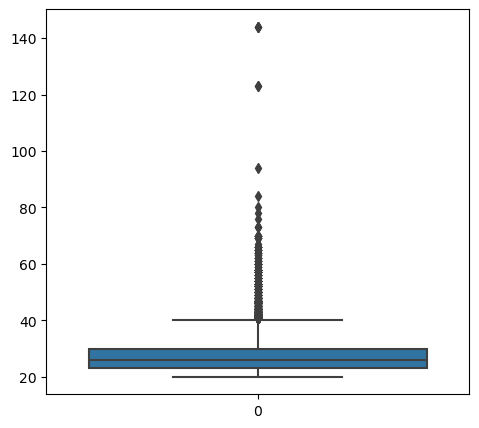

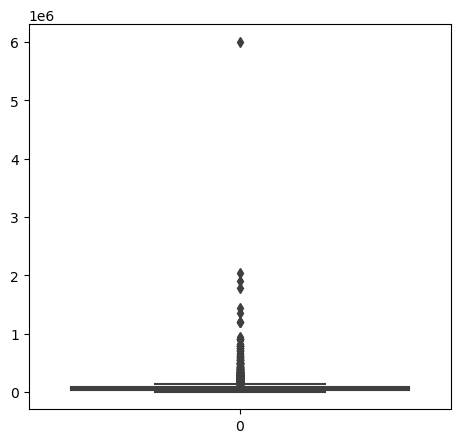

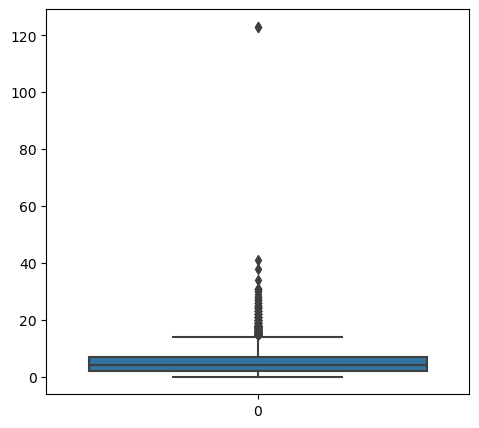

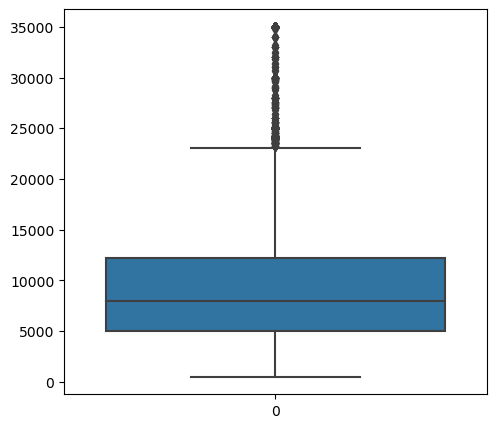

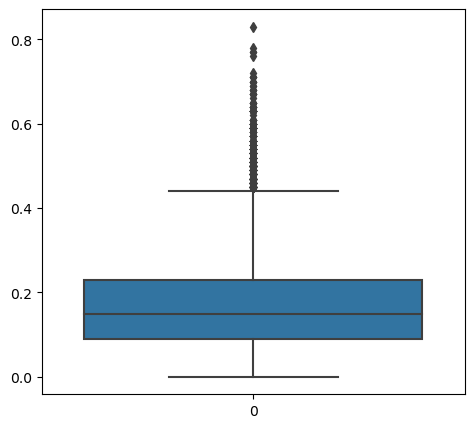

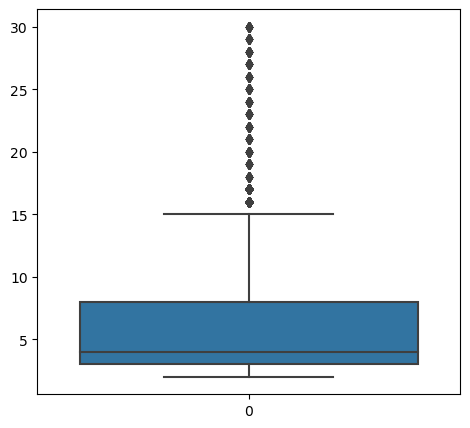

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.boxplot(df.person_age);

plt.figure(figsize=(12,5))
plt.subplot(122)
sns.boxplot(df.person_income);

plt.figure(figsize=(12,5))
plt.subplot(122)
sns.boxplot(df.person_emp_length);

plt.figure(figsize=(12,5))
plt.subplot(122)
sns.boxplot(df.loan_amnt);

plt.figure(figsize=(12,5))
plt.subplot(122)
sns.boxplot(df.loan_percent_income);

plt.figure(figsize=(12,5))
plt.subplot(122)
sns.boxplot(df.cb_person_cred_hist_length);


## Treating the outliers

In [14]:
Q1, Q2,Q3= (df.person_age.quantile(q = [0.25,0.5,0.75]))
print(Q1,Q2,Q3)

23.0 26.0 30.0


In [15]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

7.0 40.5 12.5


In [16]:
df[(df.person_age > UL) | (df.person_age < LL)]

person_age  person_income person_home_ownership  person_emp_length  \
81            144         250000                  RENT                4.0   
183           144         200000              MORTGAGE                4.0   
575           123          80004                  RENT                2.0   
747           123          78000                  RENT                7.0   
28962          50         900000              MORTGAGE               11.0   
...           ...            ...                   ...                ...   
32411          57          53000              MORTGAGE                1.0   
32412          54         120000              MORTGAGE                4.0   
32413          65          76000                  RENT                3.0   
32414          56         150000              MORTGAGE                5.0   
32415          66          42000                  RENT                2.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
81               VENTURE          C       4800          13.57            0   
183            EDUCATION          B       6000          11.86            0   
575            EDUCATION          B      20400          10.25            0   
747              VENTURE          B      20000          10.99            0   
28962  DEBTCONSOLIDATION          B      30000          12.69            0   
...                  ...        ...        ...            ...          ...   
32411           PERSONAL          C       5800          13.16            0   
32412           PERSONAL          A      17625           7.49            0   
32413    HOMEIMPROVEMENT          B      35000          10.99            1   
32414           PERSONAL          B      15000          11.48            0   
32415            MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
81                    0.02                         N   
183                   0.03                         N   
575                   0.25                         N   
747                   0.26                         N   
28962                 0.03                         N   
...                    ...                       ...   
32411                 0.11                         N   
32412                 0.15                         N   
32413                 0.46                         N   
32414                 0.10                         N   
32415                 0.15                         N   

       cb_person_cred_hist_length  
81                              3  
183                             2  
575                             3  
747                             4  
28962                          15  
...                           ...  
32411                          30  
32412                          19  
32413                          28  
32414                          26  
32415                          30  

[1491 rows x 12 columns]

In [17]:
drop_age=df[(df.person_age > UL) | (df.person_age < LL)].index.tolist()
len(drop_age)

1491

In [18]:
df.drop(drop_age,axis=0,inplace=True)

In [19]:
df.shape

(30925, 12)

In [20]:
Q1, Q2,Q3= (df.person_income.quantile(q = [0.25,0.5,0.75]))
print(Q1,Q2,Q3)

38400.0 55000.0 78750.0


In [21]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

40350.0 139275.0 -22125.0


In [22]:
df[(df.person_income > UL) | (df.person_income < LL)]

person_age  person_income person_home_ownership  person_emp_length  \
15             23         500000              MORTGAGE                7.0   
20             25         162500                  RENT                2.0   
33             25         306000                  RENT                2.0   
34             26         300000              MORTGAGE               10.0   
42             26         300000              MORTGAGE               10.0   
...           ...            ...                   ...                ...   
32068          38         140000              MORTGAGE                0.0   
32086          36         160000                   OWN               20.0   
32090          39         325000              MORTGAGE               14.0   
32104          39         150000              MORTGAGE                9.0   
32127          38         200000              MORTGAGE                0.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
15     DEBTCONSOLIDATION          B      30000          10.65            0   
20               VENTURE          A      35000           7.49            0   
33     DEBTCONSOLIDATION          C      24250          13.85            0   
34               MEDICAL          C       7800          13.49            0   
42               VENTURE          A      20000           7.88            0   
...                  ...        ...        ...            ...          ...   
32068            VENTURE          B      25000           9.99            0   
32086            VENTURE          D      24000          14.96            0   
32090           PERSONAL          D      18000          14.96            0   
32104            MEDICAL          A      30000           8.90            0   
32127  DEBTCONSOLIDATION          A       3000           7.68            0   

       loan_percent_income cb_person_default_on_file  \
15                    0.06                         N   
20                    0.22                         N   
33                    0.08                         N   
34                    0.03                         N   
42                    0.07                         N   
...                    ...                       ...   
32068                 0.18                         N   
32086                 0.15                         Y   
32090                 0.06                         Y   
32104                 0.20                         N   
32127                 0.01                         N   

       cb_person_cred_hist_length  
15                              3  
20                              4  
33                              3  
34                              4  
42                              4  
...                           ...  
32068                          13  
32086                          15  
32090                          17  
32104                          11  
32127                          12  

[1468 rows x 12 columns]

In [23]:
drop_income=df[(df.person_income > UL) | (df.person_income < LL)].index.tolist()
len(drop_income)

1468

In [24]:
df.drop(drop_income,axis=0,inplace=True)

In [25]:
Q1, Q2,Q3= (df.person_emp_length.quantile(q = [0.25,0.5,0.75]))
print(Q1,Q2,Q3)

2.0 4.0 7.0


In [26]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

5.0 14.5 -5.5


In [27]:
df[(df.person_emp_length > UL) | (df.person_emp_length < LL)]

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
17728          34         120000                  RENT               17.0   
17766          34          61200                  RENT               18.0   
17794          31          73000                  RENT               15.0   
17891          30          65000                  RENT               15.0   
...           ...            ...                   ...                ...   
32108          40          43000              MORTGAGE               18.0   
32115          36          53800              MORTGAGE               20.0   
32121          36          48686                  RENT               21.0   
32123          38          99996                   OWN               22.0   
32129          36          92000              MORTGAGE               18.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0               PERSONAL          D      35000          16.02            1   
17728            VENTURE          B      35000          10.59            0   
17766            MEDICAL          B      30000          11.71            1   
17794    HOMEIMPROVEMENT          B      29700          11.11            1   
17891    HOMEIMPROVEMENT          B      25000          10.99            1   
...                  ...        ...        ...            ...          ...   
32108           PERSONAL          C       2500          12.84            0   
32115  DEBTCONSOLIDATION          D      18200          18.25            1   
32121            MEDICAL          D      12000          13.99            0   
32123            MEDICAL          D      25000          14.96            0   
32129  DEBTCONSOLIDATION          A       4000           7.29            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
17728                 0.29                         N   
17766                 0.49                         N   
17794                 0.41                         N   
17891                 0.38                         N   
...                    ...                       ...   
32108                 0.06                         N   
32115                 0.34                         Y   
32121                 0.25                         N   
32123                 0.25                         N   
32129                 0.04                         N   

       cb_person_cred_hist_length  
0                               3  
17728                           6  
17766                           8  
17794                           7  
17891                           5  
...                           ...  
32108                          14  
32115                          12  
32121                          13  
32123                          11  
32129                          13  

[613 rows x 12 columns]

In [28]:
drop_emp_len=df[(df.person_emp_length > UL) | (df.person_emp_length < LL)].index.tolist()
len(drop_emp_len)

613

In [29]:
df.drop(drop_emp_len,axis=0,inplace=True)

In [30]:
df.shape

(28844, 12)

# Data Visualization 

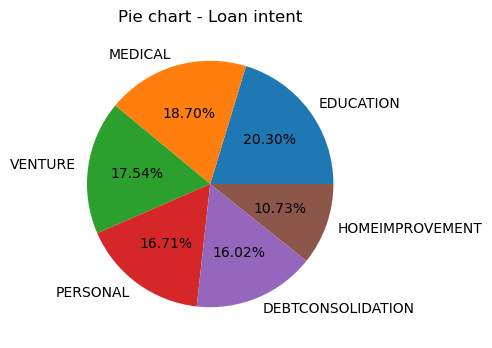

In [101]:
plt.figure(figsize=(4,4),dpi=100)
plt.pie(x=df.loan_intent.value_counts().values,labels=df.loan_intent.value_counts().index,autopct="%.2f%%")
plt.title("Pie chart - Loan intent");

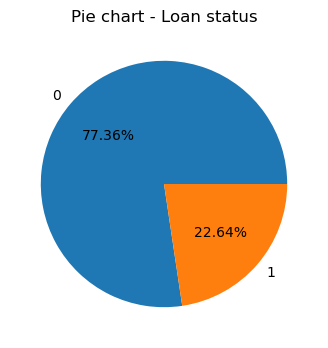

In [100]:
plt.figure(figsize=(4,4),dpi=100)
plt.pie(x=df.loan_status.value_counts().values,labels=df.loan_status.value_counts().index,autopct="%.2f%%")
plt.title("Pie chart - Loan status");

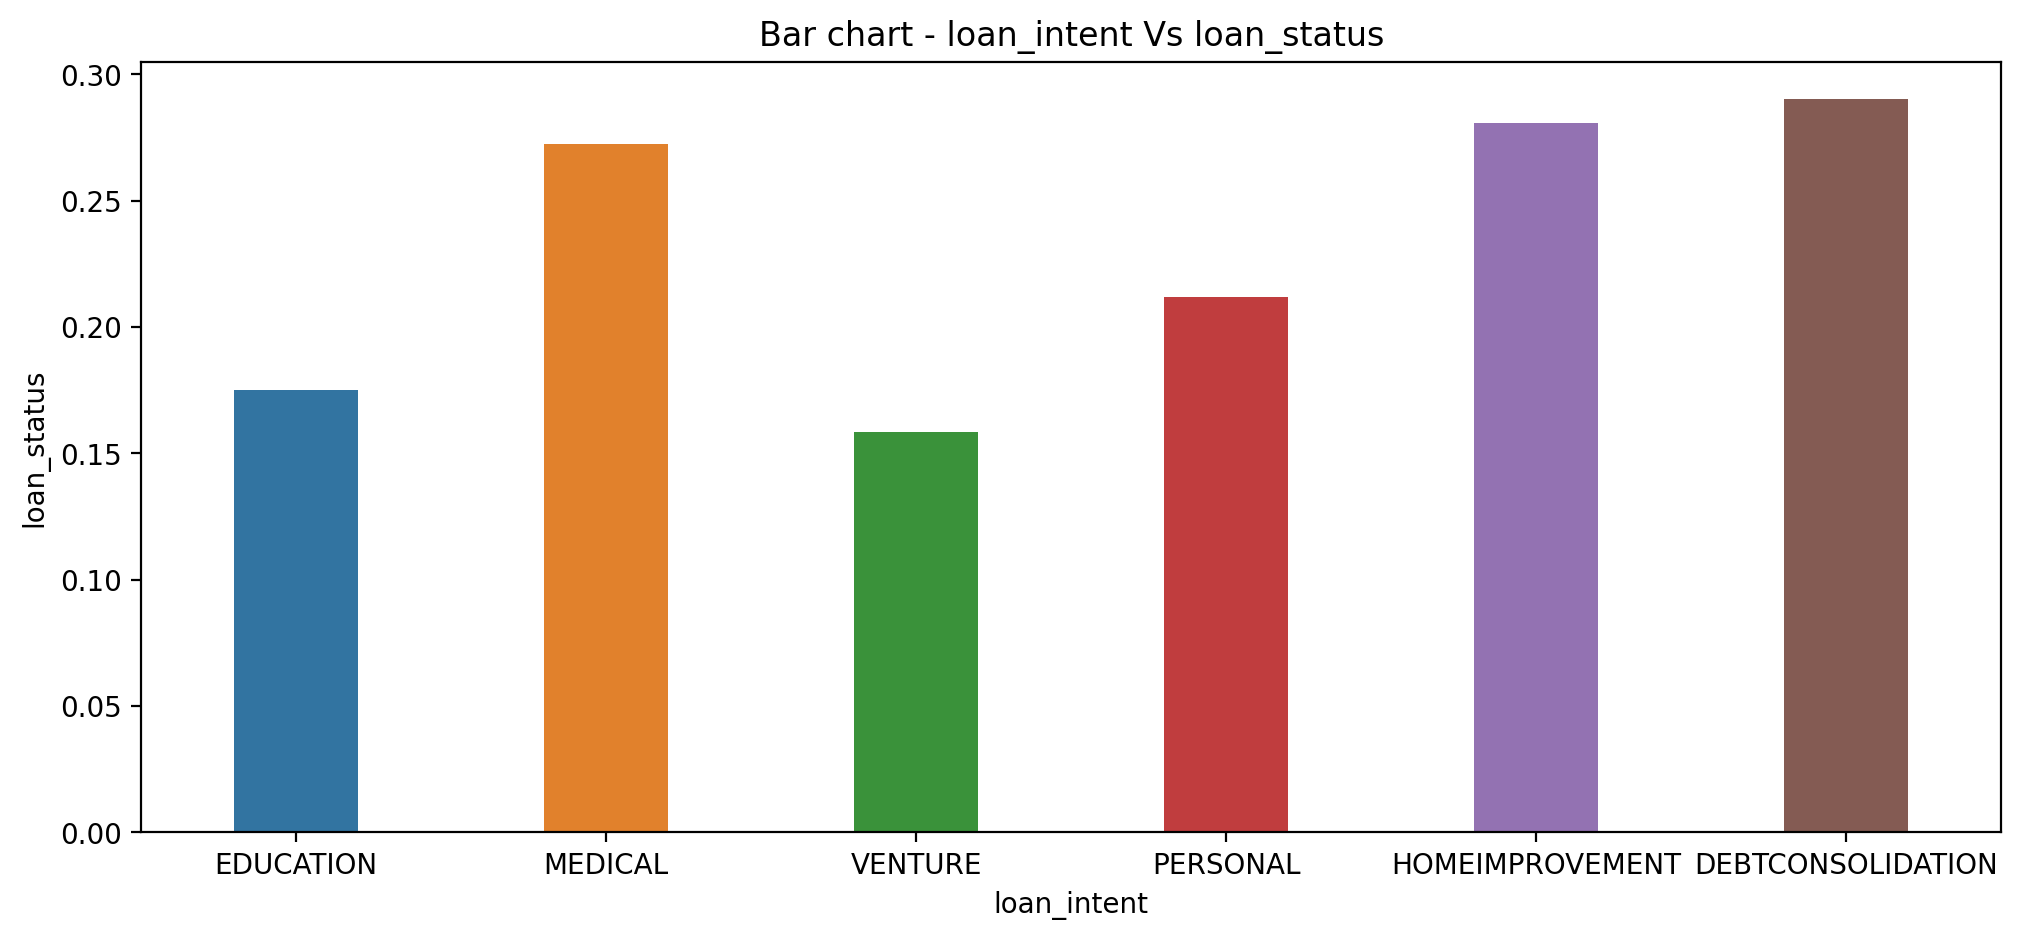

In [105]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x="loan_intent",y="loan_status",data=df,ci=False,width=0.4)
plt.title("Bar chart - loan_intent Vs loan_status")
plt.xlabel("loan_intent",fontsize=10,color="black")
plt.ylabel("loan_status",fontsize=10,color="black");

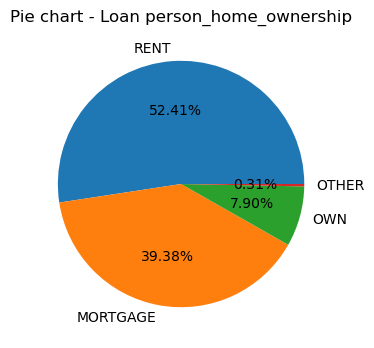

In [99]:
plt.figure(figsize=(4,4),dpi=100)
plt.pie(x=df.person_home_ownership.value_counts().values,labels=df.person_home_ownership.value_counts().index,autopct="%.2f%%")
plt.title("Pie chart - Loan person_home_ownership");

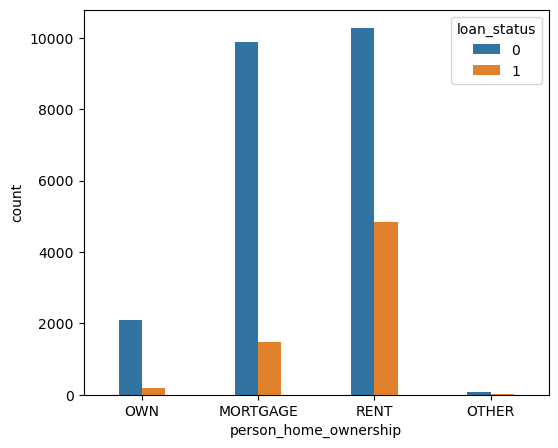

In [102]:
plt.figure(figsize=(6,5))
sns.countplot(x='person_home_ownership',hue='loan_status',width=0.4, data=df);

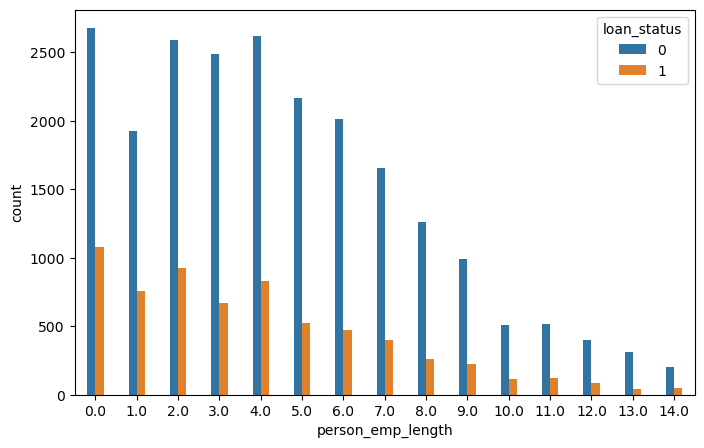

In [107]:
plt.figure(figsize=(8,5))
sns.countplot(x='person_emp_length',hue='loan_status',width=0.4, data=df);

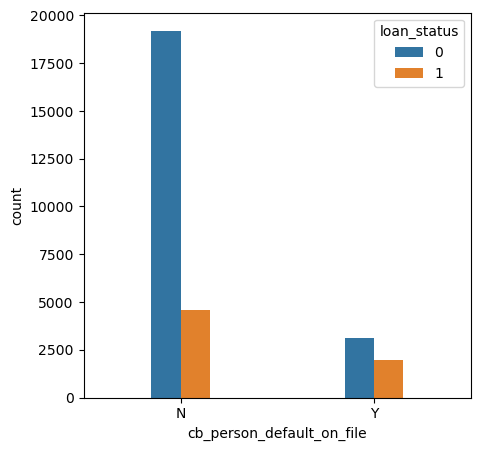

In [112]:
plt.figure(figsize=(5,5))
sns.countplot(x='cb_person_default_on_file',hue='loan_status',width=0.3, data=df);

In [129]:
df.groupby(['loan_status'])[['person_income']].mean()

person_income
loan_status               
0             61783.843155
1             45268.650329

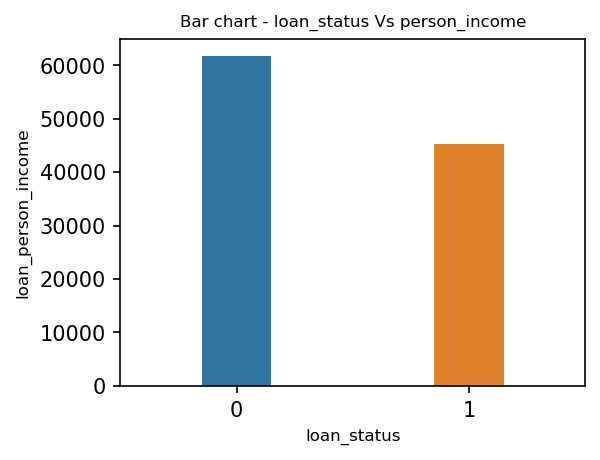

In [128]:
plt.figure(figsize=(4,3),dpi=150)
sns.barplot(x="loan_status",y="person_income",data=df,ci=False,width=0.3)
plt.title("Bar chart - loan_status Vs person_income",fontsize=8)
plt.xlabel("loan_status",fontsize=8,color="black")
plt.ylabel("loan_person_income",fontsize=8,color="black");

In [131]:
df.groupby(['loan_status'])[['loan_amnt']].mean()

loan_amnt
loan_status              
0             8842.572261
1            10587.708684

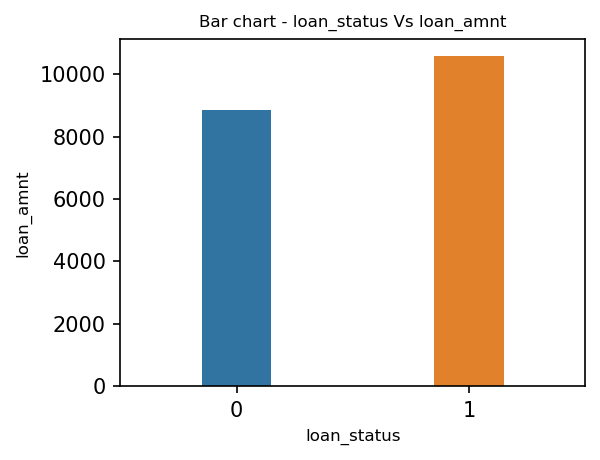

In [132]:
plt.figure(figsize=(4,3),dpi=150)
sns.barplot(x="loan_status",y="loan_amnt",data=df,ci=False,width=0.3)
plt.title("Bar chart - loan_status Vs loan_amnt",fontsize=8)
plt.xlabel("loan_status",fontsize=8,color="black")
plt.ylabel("loan_amnt",fontsize=8,color="black");

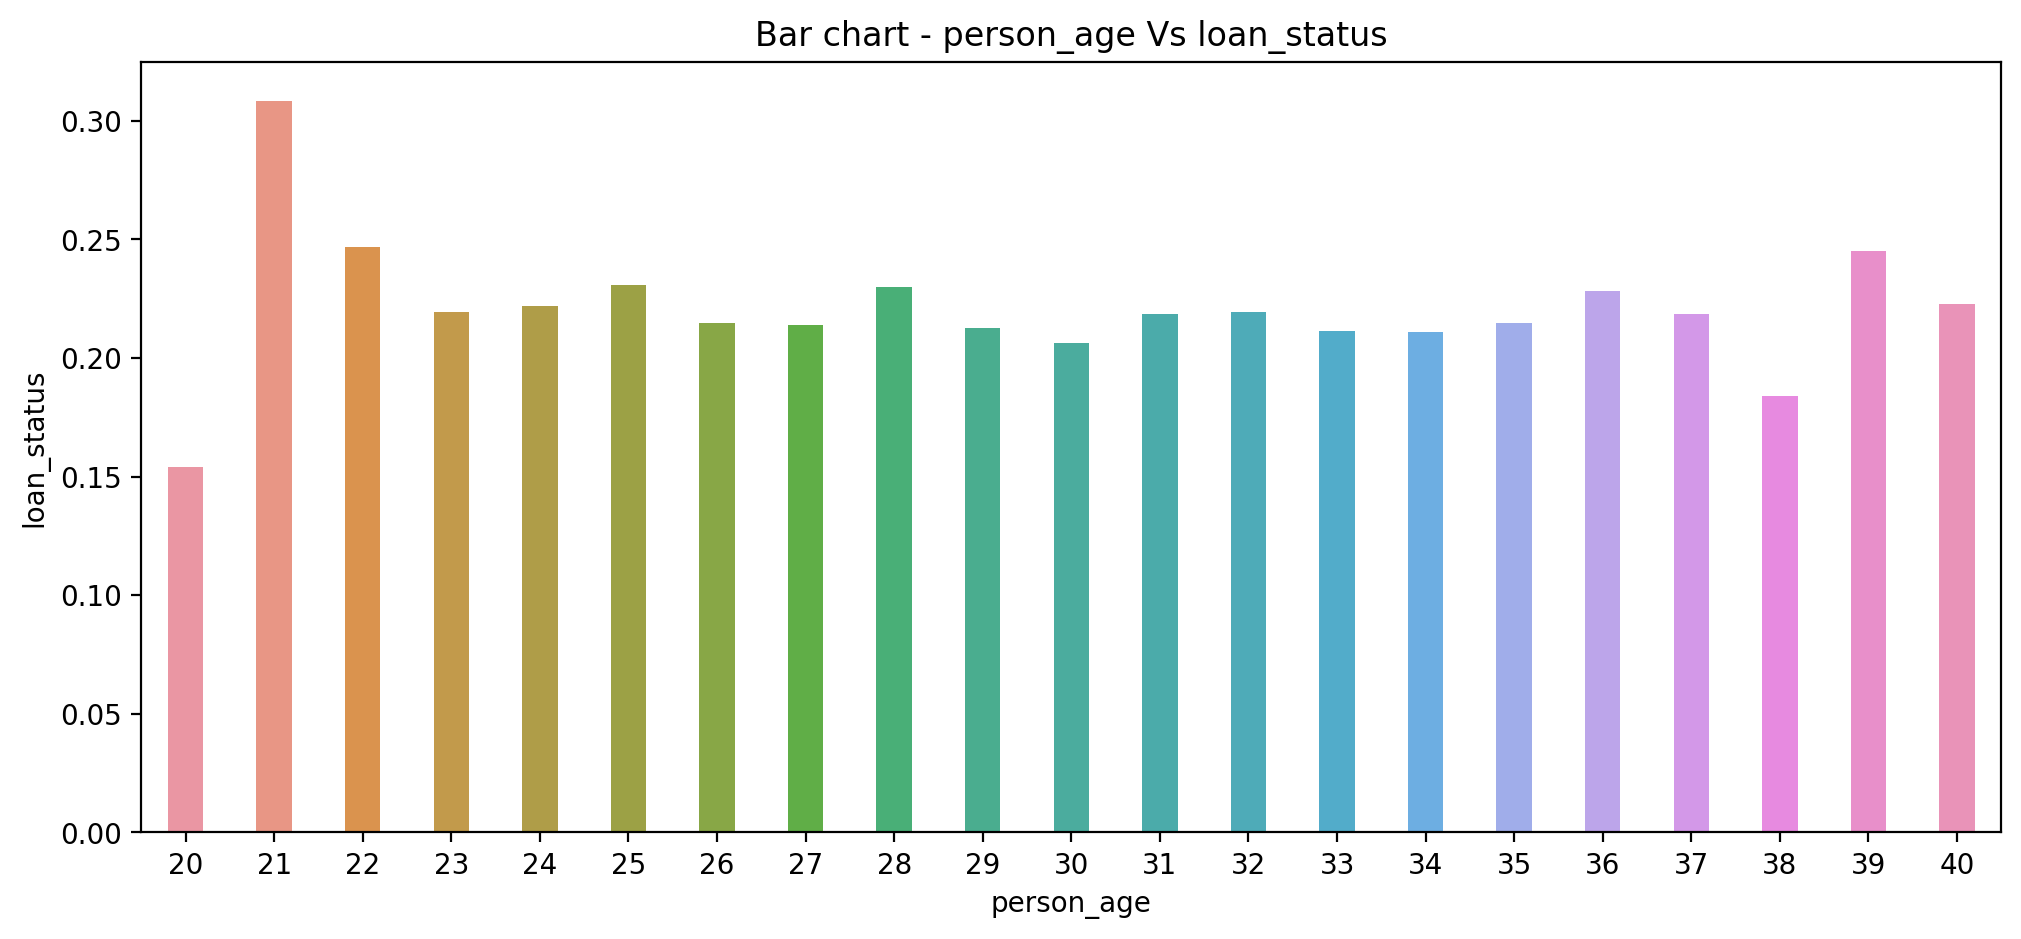

In [85]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x="person_age",y="loan_status",data=df,ci=False,width=0.4)
plt.title("Bar chart - person_age Vs loan_status")
plt.xlabel("person_age",fontsize=10,color="black")
plt.ylabel("loan_status",fontsize=10,color="black");

## Multivariate Analysis
### pair plot

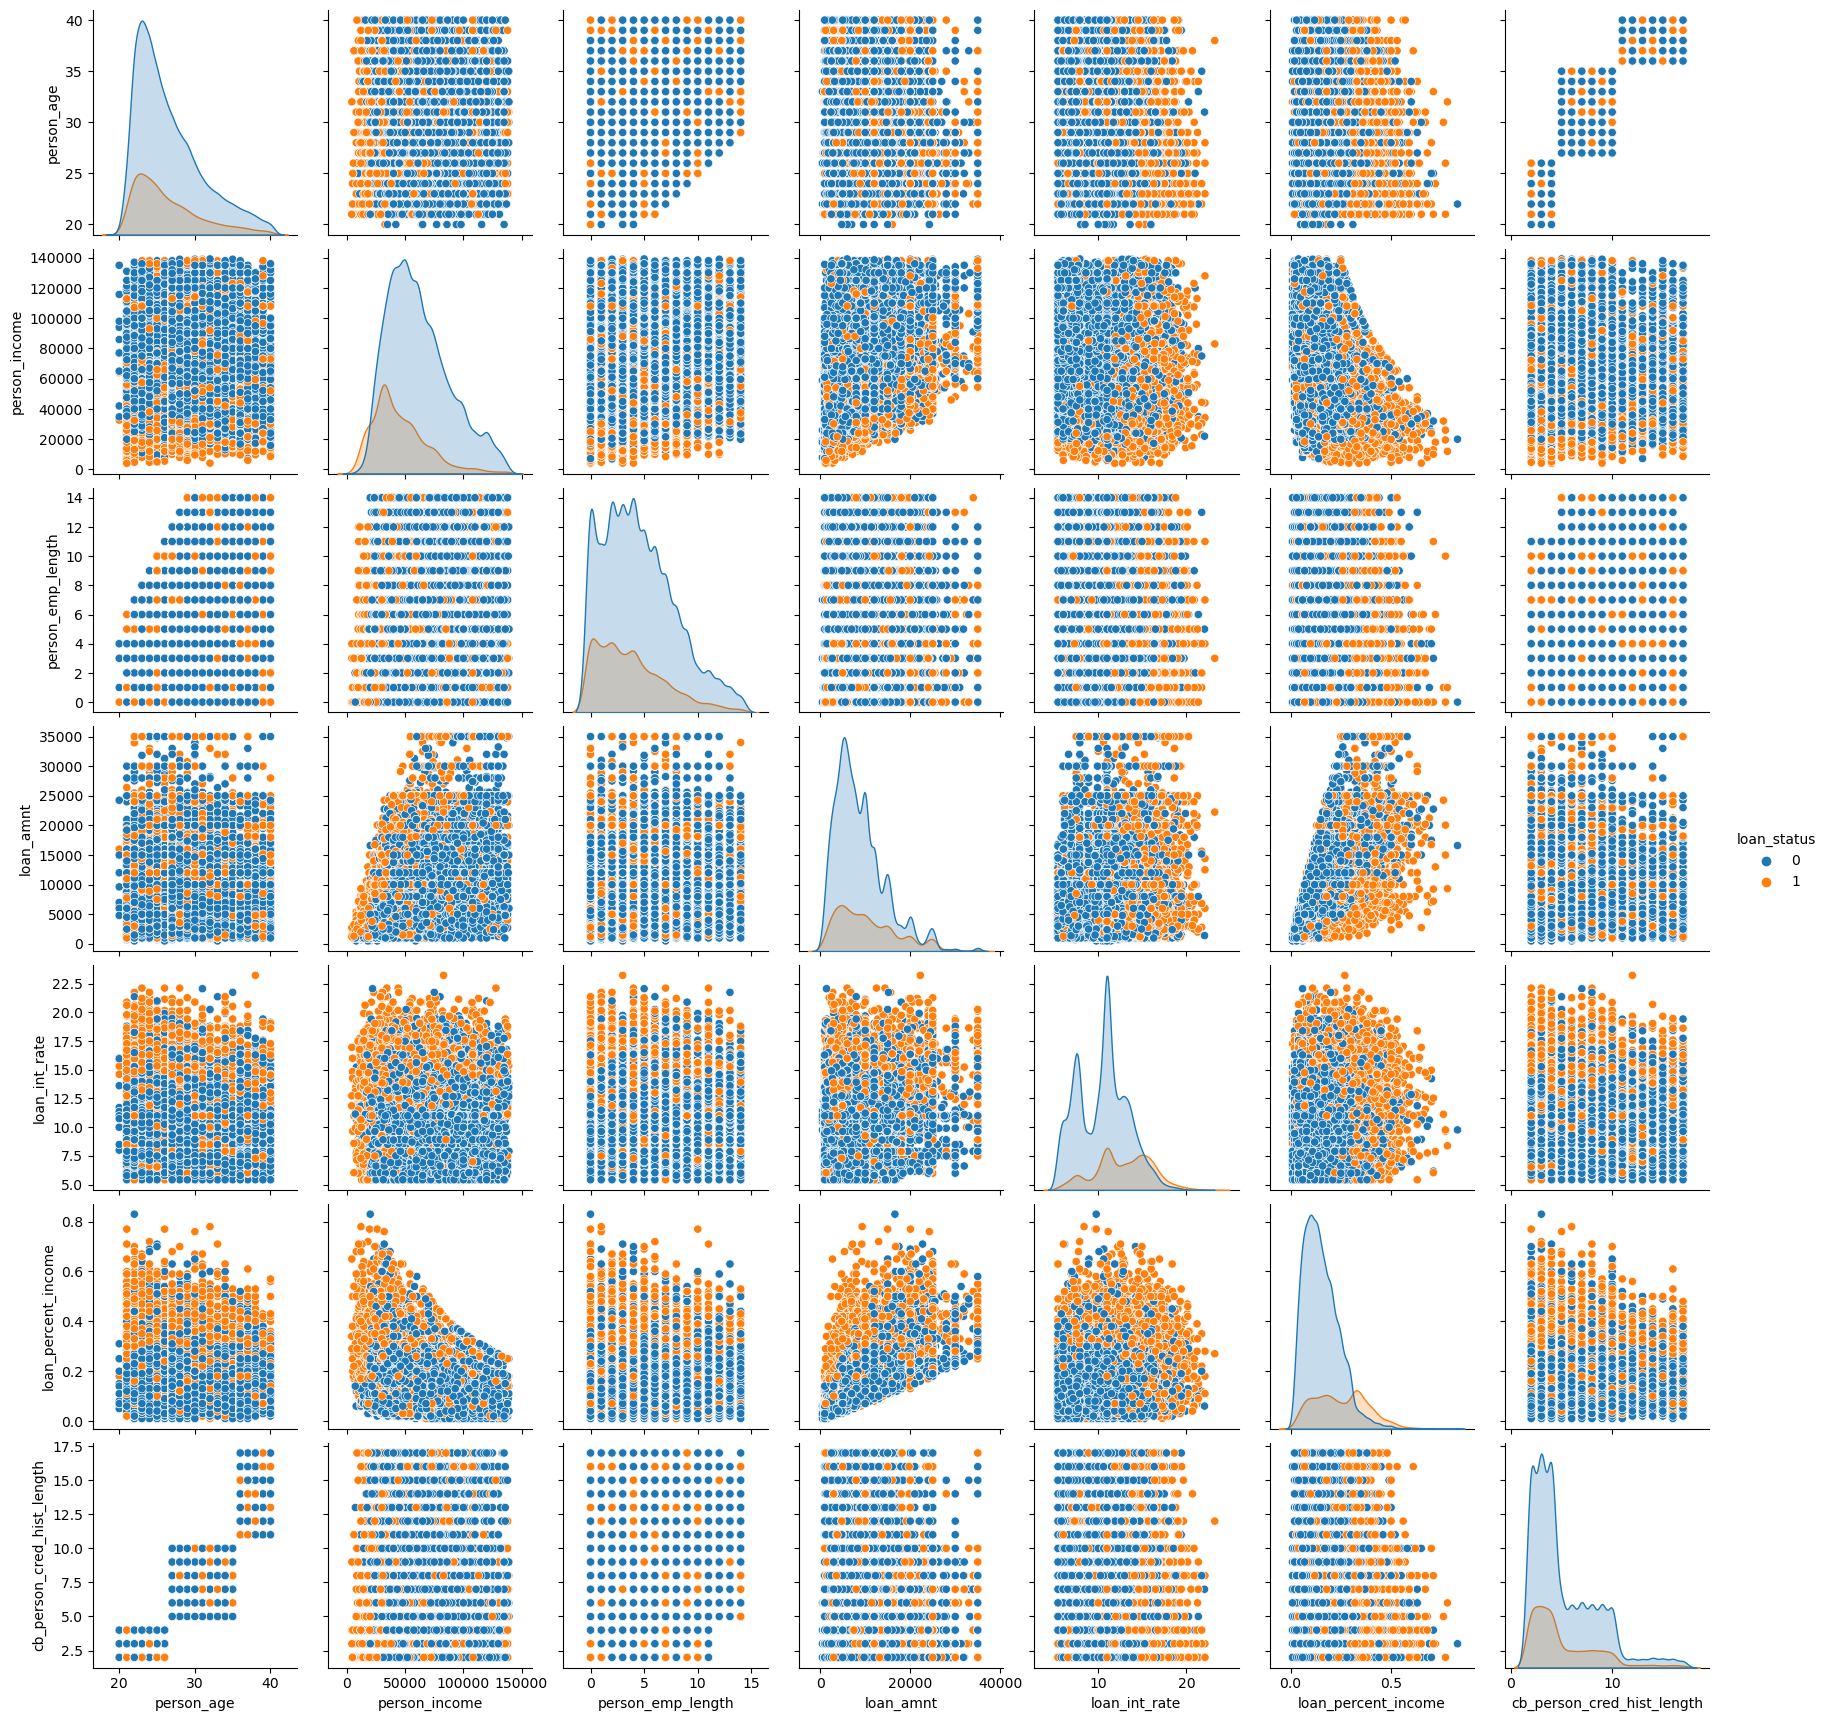

In [34]:
sns.pairplot(df, hue='loan_status');

### Heatmap

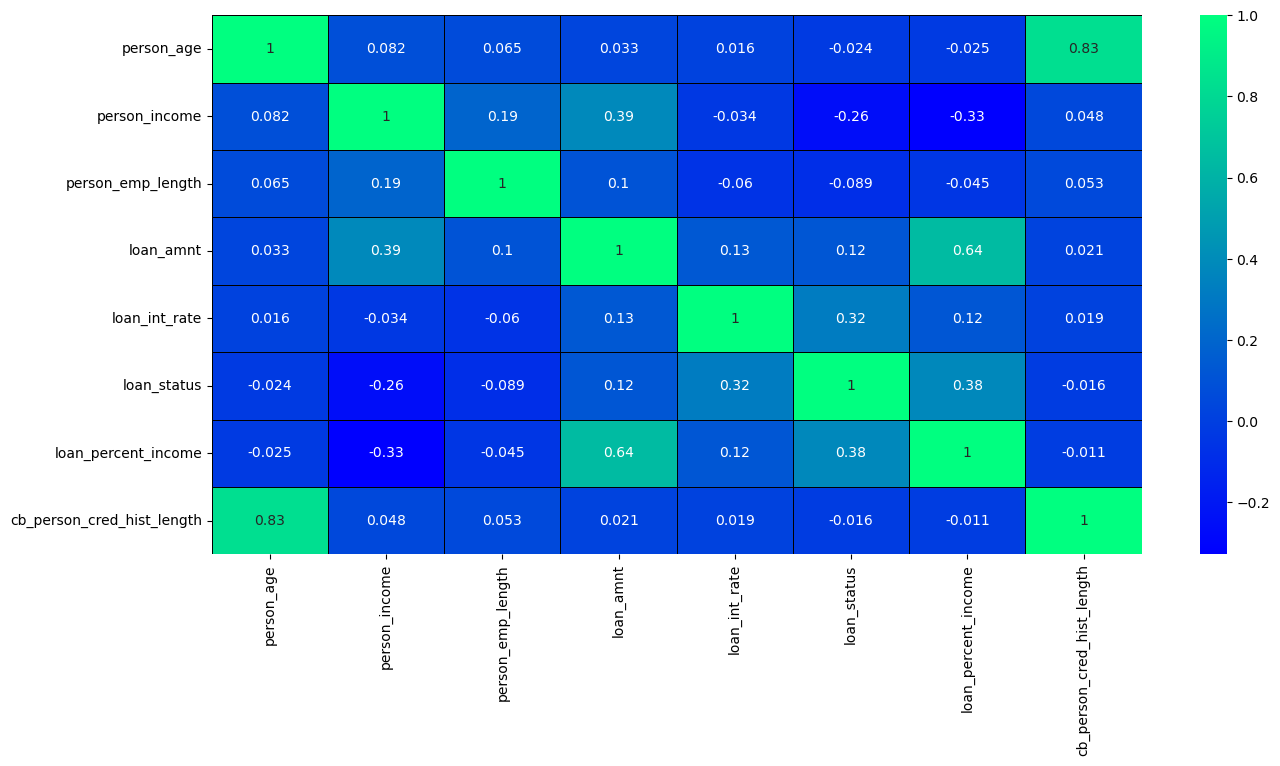

In [35]:
i=df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(i, annot=True, linewidths=0.5,cmap='winter', linecolor='black');

# Data Preparation

## a. Identify the Target Variable and Splitting the Data into Train and Test

In [36]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [37]:
import sklearn

# Identifying the inputs (X) and output (y)

y = df['loan_status']
X = df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'cb_person_default_on_file', 'loan_percent_income','cb_person_cred_hist_length']]

In [38]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

X_train.head()

person_age  person_income person_home_ownership  person_emp_length  \
4046           23          61000                  RENT                2.0   
14800          24         115000              MORTGAGE                7.0   
1246           22          45000                  RENT                6.0   
6372           25          49200              MORTGAGE                6.0   
5397           22          25000                  RENT                2.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  \
4046   DEBTCONSOLIDATION          D       4000          16.00   
14800    HOMEIMPROVEMENT          A       1500           6.76   
1246   DEBTCONSOLIDATION          B      16000          10.59   
6372             MEDICAL          A       5600           7.49   
5397           EDUCATION          A       8400           6.62   

      cb_person_default_on_file  loan_percent_income  \
4046                          Y                 0.07   
14800                         N                 0.01   
1246                          N                 0.36   
6372                          N                 0.11   
5397                          N                 0.34   

       cb_person_cred_hist_length  
4046                            4  
14800                           4  
1246                            4  
6372                            2  
5397                            2

In [39]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(21633, 11) (21633,)
(7211, 11) (7211,)


## b. Separating Categorical and Numerical Columns

In [40]:
X_train.head()

person_age  person_income person_home_ownership  person_emp_length  \
4046           23          61000                  RENT                2.0   
14800          24         115000              MORTGAGE                7.0   
1246           22          45000                  RENT                6.0   
6372           25          49200              MORTGAGE                6.0   
5397           22          25000                  RENT                2.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  \
4046   DEBTCONSOLIDATION          D       4000          16.00   
14800    HOMEIMPROVEMENT          A       1500           6.76   
1246   DEBTCONSOLIDATION          B      16000          10.59   
6372             MEDICAL          A       5600           7.49   
5397           EDUCATION          A       8400           6.62   

      cb_person_default_on_file  loan_percent_income  \
4046                          Y                 0.07   
14800                         N                 0.01   
1246                          N                 0.36   
6372                          N                 0.11   
5397                          N                 0.34   

       cb_person_cred_hist_length  
4046                            4  
14800                           4  
1246                            4  
6372                            2  
5397                            2

In [41]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
cb_person_default_on_file      object
loan_percent_income           float64
cb_person_cred_hist_length      int64
dtype: object

In [42]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

person_home_ownership        loan_intent loan_grade  \
4046                   RENT  DEBTCONSOLIDATION          D   
14800              MORTGAGE    HOMEIMPROVEMENT          A   
1246                   RENT  DEBTCONSOLIDATION          B   
6372               MORTGAGE            MEDICAL          A   
5397                   RENT          EDUCATION          A   

      cb_person_default_on_file  
4046                          Y  
14800                         N  
1246                          N  
6372                          N  
5397                          N

In [43]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
4046           23          61000                2.0       4000          16.00   
14800          24         115000                7.0       1500           6.76   
1246           22          45000                6.0      16000          10.59   
6372           25          49200                6.0       5600           7.49   
5397           22          25000                2.0       8400           6.62   

       loan_percent_income  cb_person_cred_hist_length  
4046                  0.07                           4  
14800                 0.01                           4  
1246                  0.36                           4  
6372                  0.11                           2  
5397                  0.34                           2

## c. Scaling the Numerical Features


In [44]:
X_train_num.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
4046           23          61000                2.0       4000          16.00   
14800          24         115000                7.0       1500           6.76   
1246           22          45000                6.0      16000          10.59   
6372           25          49200                6.0       5600           7.49   
5397           22          25000                2.0       8400           6.62   

       loan_percent_income  cb_person_cred_hist_length  
4046                  0.07                           4  
14800                 0.01                           4  
1246                  0.36                           4  
6372                  0.11                           2  
5397                  0.34                           2

In [45]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
4046    -0.812044       0.112133          -0.705508  -0.869571       1.609638   
14800   -0.585198       2.117669           0.786578  -1.286408      -1.375372   
1246    -1.038889      -0.482100           0.488161   1.131250      -0.138079   
6372    -0.358352      -0.326114           0.488161  -0.602795      -1.139543   
5397    -1.038889      -1.224891          -0.705508  -0.135936      -1.420599   

       loan_percent_income  cb_person_cred_hist_length  
4046             -0.973774                   -0.364361  
14800            -1.530707                   -0.364361  
1246              1.718073                   -0.364361  
6372             -0.602485                   -0.978169  
5397              1.532428                   -0.978169

In [46]:
X_train_num.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  21633.000000   21633.000000       21633.000000  21633.000000   
mean      26.579716   57980.772061           4.364166   9215.283363   
std        4.408383   26926.087283           3.351090   5997.677316   
min       20.000000    4080.000000           0.000000    500.000000   
25%       23.000000   37440.000000           2.000000   5000.000000   
50%       25.000000   54000.000000           4.000000   8000.000000   
75%       29.000000   74400.000000           6.000000  12000.000000   
max       40.000000  139200.000000          14.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  
count   21633.000000         21633.000000                21633.000000  
mean       11.017419             0.174907                    5.187214  
std         3.095539             0.107735                    3.258422  
min         5.420000             0.010000                    2.000000  
25%         8.490000             0.090000                    3.000000  
50%        10.990000             0.150000                    4.000000  
75%        13.160000             0.230000                    7.000000  
max        23.220000             0.830000                   17.000000

In [47]:
X_train_num_rescaled.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  2.163300e+04   2.163300e+04       2.163300e+04  2.163300e+04   
mean  -2.939656e-17  -2.364863e-17       3.916804e-17 -1.090465e-16   
std    1.000023e+00   1.000023e+00       1.000023e+00  1.000023e+00   
min   -1.492581e+00  -2.001851e+00      -1.302343e+00 -1.453143e+00   
25%   -8.120436e-01  -7.628753e-01      -7.055079e-01 -7.028355e-01   
50%   -3.583520e-01  -1.478441e-01      -1.086734e-01 -2.026303e-01   
75%    5.490312e-01   6.098029e-01       4.881612e-01  4.643099e-01   
max    3.044335e+00   3.016447e+00       2.875499e+00  4.299216e+00   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  
count   2.163300e+04         2.163300e+04                2.163300e+04  
mean    4.466963e-17        -5.263462e-17                1.208708e-16  
std     1.000023e+00         1.000023e+00                1.000023e+00  
min    -1.808263e+00        -1.530707e+00               -9.781690e-01  
25%    -8.164903e-01        -7.881292e-01               -6.712649e-01  
50%    -8.857861e-03        -2.311954e-01               -3.643608e-01  
75%     6.921671e-01         5.113829e-01                5.563514e-01  
max     3.942080e+00         6.080720e+00                3.625392e+00

In [48]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 7
Mean of each column: [2.65797162e+01 5.79807721e+04 4.36416586e+00 9.21528336e+03
 1.10174192e+01 1.74907318e-01 5.18721398e+00]
Std of each column: [4.40828078e+00 2.69254649e+04 3.35101239e+00 5.99753869e+03
 3.09546747e+00 1.07732743e-01 3.25834703e+00]


## d. Segregating Nominal and Ordinal Categorical columns

In [49]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

person_home_ownership        loan_intent loan_grade  \
4046                   RENT  DEBTCONSOLIDATION          D   
14800              MORTGAGE    HOMEIMPROVEMENT          A   
1246                   RENT  DEBTCONSOLIDATION          B   
6372               MORTGAGE            MEDICAL          A   
5397                   RENT          EDUCATION          A   

      cb_person_default_on_file  
4046                          Y  
14800                         N  
1246                          N  
6372                          N  
5397                          N

In [50]:
X_train_cat_nominal=X_train[["person_home_ownership", "loan_intent"]]
X_train_cat_ordinal=X_train[['loan_grade']]

In [51]:
# OneHotEncoding the nominal categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat_nominal), 
                               columns=encoder.get_feature_names_out(X_train_cat_nominal.columns), 
                               index = X_train_cat_nominal.index)

X_train_cat_ohe.head()

person_home_ownership_OTHER  person_home_ownership_OWN  \
4046                           0.0                        0.0   
14800                          0.0                        0.0   
1246                           0.0                        0.0   
6372                           0.0                        0.0   
5397                           0.0                        0.0   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
4046                          1.0                    0.0   
14800                         0.0                    0.0   
1246                          1.0                    0.0   
6372                          0.0                    0.0   
5397                          1.0                    1.0   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
4046                           0.0                  0.0                   0.0   
14800                          1.0                  0.0                   0.0   
1246                           0.0                  0.0                   0.0   
6372                           0.0                  1.0                   0.0   
5397                           0.0                  0.0                   0.0   

       loan_intent_VENTURE  
4046                   0.0  
14800                  0.0  
1246                   0.0  
6372                   0.0  
5397                   0.0

In [52]:
# Applying Label Encoding on Categorical Columns

X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

Empty DataFrame
Columns: []
Index: [4046, 14800, 1246, 6372, 5397]

In [53]:
X_train_cat.loan_grade.unique()

array(['D', 'A', 'B', 'C', 'E', 'G', 'F'], dtype=object)

In [54]:
cut_encoder = {'G':1,'F':2,'E':3,'D':4,'C':5,'B':6,'A':7}

X_train_cat_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

loan_grade
4046            4
14800           7
1246            6
6372            7
5397            7

## e. Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [55]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe,X_train_cat_le], axis=1)

X_train_transformed.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
4046    -0.812044       0.112133          -0.705508  -0.869571       1.609638   
14800   -0.585198       2.117669           0.786578  -1.286408      -1.375372   
1246    -1.038889      -0.482100           0.488161   1.131250      -0.138079   
6372    -0.358352      -0.326114           0.488161  -0.602795      -1.139543   
5397    -1.038889      -1.224891          -0.705508  -0.135936      -1.420599   

       loan_percent_income  cb_person_cred_hist_length  \
4046             -0.973774                   -0.364361   
14800            -1.530707                   -0.364361   
1246              1.718073                   -0.364361   
6372             -0.602485                   -0.978169   
5397              1.532428                   -0.978169   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
4046                           0.0                        0.0   
14800                          0.0                        0.0   
1246                           0.0                        0.0   
6372                           0.0                        0.0   
5397                           0.0                        0.0   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
4046                          1.0                    0.0   
14800                         0.0                    0.0   
1246                          1.0                    0.0   
6372                          0.0                    0.0   
5397                          1.0                    1.0   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
4046                           0.0                  0.0                   0.0   
14800                          1.0                  0.0                   0.0   
1246                           0.0                  0.0                   0.0   
6372                           0.0                  1.0                   0.0   
5397                           0.0                  0.0                   0.0   

       loan_intent_VENTURE  loan_grade  
4046                   0.0           4  
14800                  0.0           7  
1246                   0.0           6  
6372                   0.0           7  
5397                   0.0           7

## f. Preparing Test Data

In [56]:
X_test.head()

person_age  person_income person_home_ownership  person_emp_length  \
7034           23          14898                  RENT                4.0   
4944           25          34800                  RENT                2.0   
13677          24          95000                   OWN                8.0   
21573          30          50000              MORTGAGE                2.0   
3988           23          51996                  RENT                7.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  \
7034             VENTURE          C       6250          15.27   
4944            PERSONAL          D       5000          16.02   
13677          EDUCATION          E      25000          16.32   
21573          EDUCATION          B       3975          10.99   
3988   DEBTCONSOLIDATION          C       4000          13.98   

      cb_person_default_on_file  loan_percent_income  \
7034                          N                 0.42   
4944                          Y                 0.14   
13677                         N                 0.26   
21573                         N                 0.08   
3988                          Y                 0.08   

       cb_person_cred_hist_length  
7034                            2  
4944                            3  
13677                           3  
21573                           8  
3988                            2

In [57]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7211 entries, 7034 to 15069
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  7211 non-null   int64  
 1   person_income               7211 non-null   int64  
 2   person_home_ownership       7211 non-null   object 
 3   person_emp_length           7211 non-null   float64
 4   loan_intent                 7211 non-null   object 
 5   loan_grade                  7211 non-null   object 
 6   loan_amnt                   7211 non-null   int64  
 7   loan_int_rate               7211 non-null   float64
 8   cb_person_default_on_file   7211 non-null   object 
 9   loan_percent_income         7211 non-null   float64
 10  cb_person_cred_hist_length  7211 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 676.0+ KB


In [58]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

person_home_ownership        loan_intent loan_grade  \
7034                   RENT            VENTURE          C   
4944                   RENT           PERSONAL          D   
13677                   OWN          EDUCATION          E   
21573              MORTGAGE          EDUCATION          B   
3988                   RENT  DEBTCONSOLIDATION          C   

      cb_person_default_on_file  
7034                          N  
4944                          Y  
13677                         N  
21573                         N  
3988                          Y

In [59]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
7034           23          14898                4.0       6250          15.27   
4944           25          34800                2.0       5000          16.02   
13677          24          95000                8.0      25000          16.32   
21573          30          50000                2.0       3975          10.99   
3988           23          51996                7.0       4000          13.98   

       loan_percent_income  cb_person_cred_hist_length  
7034                  0.42                           2  
4944                  0.14                           3  
13677                 0.26                           3  
21573                 0.08                           8  
3988                  0.08                           2

In [60]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
7034    -0.812044      -1.600075          -0.108673  -0.494417       1.373809   
4944    -0.358352      -0.860924          -0.705508  -0.702836       1.616099   
13677   -0.585198       1.374878           1.084996   2.631866       1.713015   
21573    0.775877      -0.296402          -0.705508  -0.873739      -0.008858   
3988    -0.812044      -0.222272           0.786578  -0.869571       0.957071   

       loan_percent_income  cb_person_cred_hist_length  
7034              2.275006                   -0.978169  
4944             -0.324018                   -0.671265  
13677             0.789850                   -0.671265  
21573            -0.880951                    0.863256  
3988             -0.880951                   -0.978169

In [61]:
X_test_cat_nominal=X_test[["person_home_ownership", "loan_intent"]]
X_test_cat_ordinal=X_test[['loan_grade']]

In [62]:
X_test_cat_ohe = pd.DataFrame(encoder.fit_transform(X_test_cat_nominal), 
                               columns=encoder.get_feature_names_out(X_test_cat_nominal.columns), 
                               index = X_test_cat_nominal.index)

X_train_cat_ohe.head()

person_home_ownership_OTHER  person_home_ownership_OWN  \
4046                           0.0                        0.0   
14800                          0.0                        0.0   
1246                           0.0                        0.0   
6372                           0.0                        0.0   
5397                           0.0                        0.0   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
4046                          1.0                    0.0   
14800                         0.0                    0.0   
1246                          1.0                    0.0   
6372                          0.0                    0.0   
5397                          1.0                    1.0   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
4046                           0.0                  0.0                   0.0   
14800                          1.0                  0.0                   0.0   
1246                           0.0                  0.0                   0.0   
6372                           0.0                  1.0                   0.0   
5397                           0.0                  0.0                   0.0   

       loan_intent_VENTURE  
4046                   0.0  
14800                  0.0  
1246                   0.0  
6372                   0.0  
5397                   0.0

In [63]:
X_test_cat_le = pd.DataFrame(index=X_test_cat.index)

X_test_cat_le.head()

cut_encoder = {'G':1,'F':2,'E':3,'D':4,'C':5,'B':6,'A':7}

X_test_cat_le['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x : cut_encoder[x])

X_test_cat_le.head()

Empty DataFrame
Columns: []
Index: [7034, 4944, 13677, 21573, 3988]

loan_grade
7034            5
4944            4
13677           3
21573           6
3988            5

In [64]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe,X_test_cat_le], axis=1)

X_test_transformed.head()


person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
7034    -0.812044      -1.600075          -0.108673  -0.494417       1.373809   
4944    -0.358352      -0.860924          -0.705508  -0.702836       1.616099   
13677   -0.585198       1.374878           1.084996   2.631866       1.713015   
21573    0.775877      -0.296402          -0.705508  -0.873739      -0.008858   
3988    -0.812044      -0.222272           0.786578  -0.869571       0.957071   

       loan_percent_income  cb_person_cred_hist_length  \
7034              2.275006                   -0.978169   
4944             -0.324018                   -0.671265   
13677             0.789850                   -0.671265   
21573            -0.880951                    0.863256   
3988             -0.880951                   -0.978169   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
7034                           0.0                        0.0   
4944                           0.0                        0.0   
13677                          0.0                        1.0   
21573                          0.0                        0.0   
3988                           0.0                        0.0   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
7034                          1.0                    0.0   
4944                          1.0                    0.0   
13677                         0.0                    1.0   
21573                         0.0                    1.0   
3988                          1.0                    0.0   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
7034                           0.0                  0.0                   0.0   
4944                           0.0                  0.0                   1.0   
13677                          0.0                  0.0                   0.0   
21573                          0.0                  0.0                   0.0   
3988                           0.0                  0.0                   0.0   

       loan_intent_VENTURE  loan_grade  
7034                   1.0           5  
4944                   0.0           4  
13677                  0.0           3  
21573                  0.0           6  
3988                   0.0           5

In [65]:
X_test_transformed.isna().sum()

person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
loan_grade                     0
dtype: int64

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

## Prediction

In [67]:
y_test_pred = classifier.predict(X_test_transformed)

## Evaluation

In [68]:
# calculate accuracy of class predictions
from sklearn import metrics

Logistic_Regression_accuracy=metrics.accuracy_score(y_test, y_test_pred)
Logistic_Regression_accuracy

0.8492580779364859

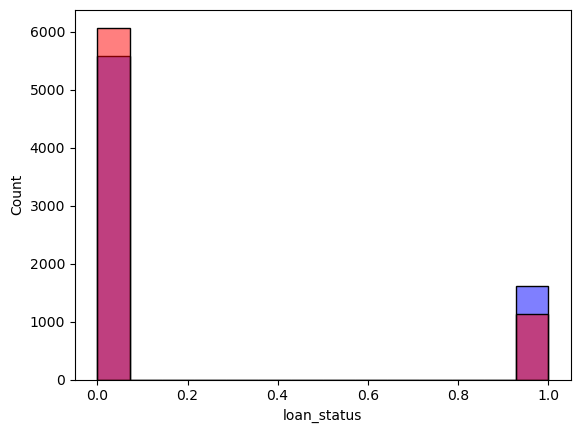

In [69]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## KNN Classifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

KNN_Classifier_accuracy=metrics.accuracy_score(y_test, y_test_pred)
KNN_Classifier_accuracy

KNeighborsClassifier()

0.8875329357925392

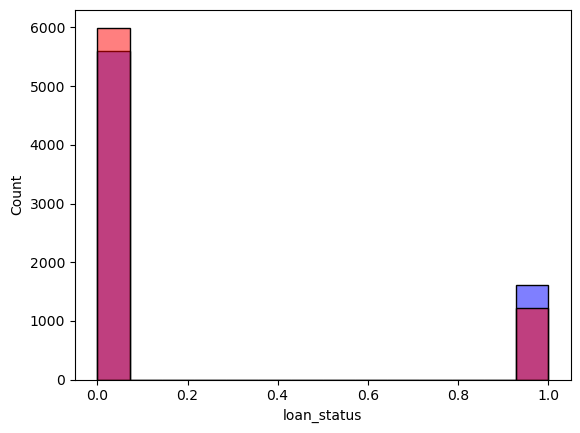

In [71]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## DT Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

DT_Classifier_accuracy=metrics.accuracy_score(y_test, y_test_pred)
DT_Classifier_accuracy

DecisionTreeClassifier()

0.8918319234502843

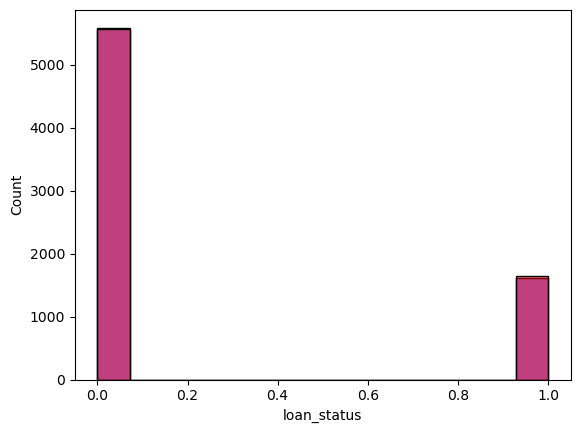

In [73]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

##  Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Random_Forest_Classifier_accuracy=metrics.accuracy_score(y_test, y_test_pred)
Random_Forest_Classifier_accuracy

RandomForestClassifier()

0.9305228123699902

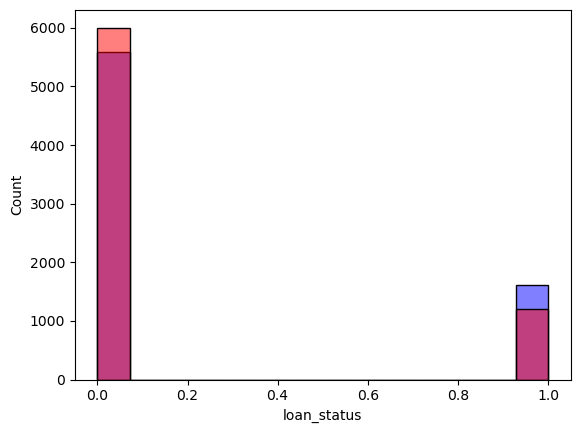

In [75]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## Gradient Boosting Classifier

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Gradient_Boosting_Classifier_accuracy=metrics.accuracy_score(y_test, y_test_pred)
Gradient_Boosting_Classifier_accuracy

GradientBoostingClassifier()

0.9201220357786715

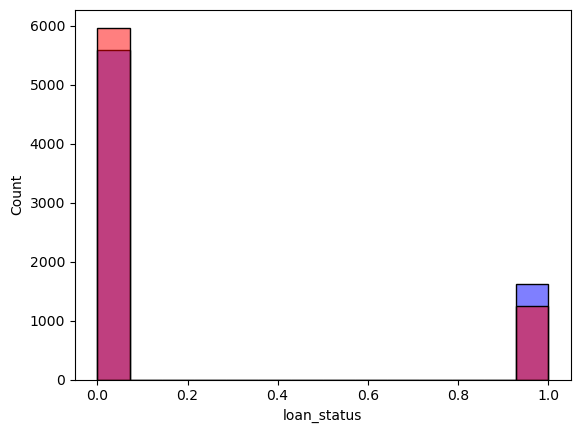

In [77]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## ADA Boost Classifier

In [78]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

ADA_Boost_Classifier_accuracy=metrics.accuracy_score(y_test, y_test_pred)
ADA_Boost_Classifier_accuracy

AdaBoostClassifier()

0.8793509915407017

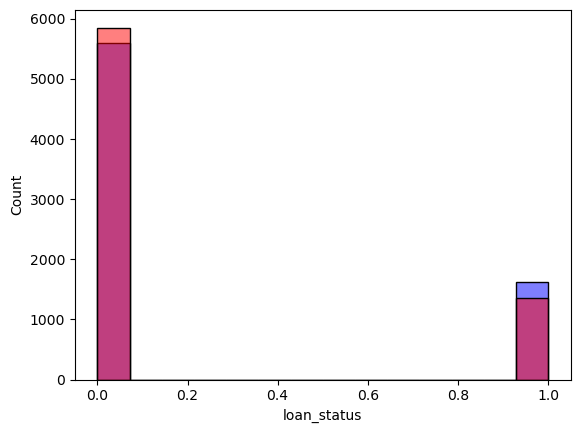

In [79]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [80]:
Results = pd.DataFrame({"Algorithm": ["RandomForestClassifier", "GradientBoostingClassifier", "DT_Classifier_accuracy", 
                                      "KNN_Classifier_accuracy","AdaBoostClassifier",
                                     "LogisticRegression"],
           "Accuracy": [Random_Forest_Classifier_accuracy,Gradient_Boosting_Classifier_accuracy, DT_Classifier_accuracy, 
                                   KNN_Classifier_accuracy,ADA_Boost_Classifier_accuracy,
                                   Logistic_Regression_accuracy]})
Results

Algorithm  Accuracy
0      RandomForestClassifier  0.930523
1  GradientBoostingClassifier  0.920122
2      DT_Classifier_accuracy  0.891832
3     KNN_Classifier_accuracy  0.887533
4          AdaBoostClassifier  0.879351
5          LogisticRegression  0.849258

## Observation
Maximum accuracy found was **93.06%**. This accuracy was attained using RandomForestClassifier. Hence, **RandomForestClassifier** is the best algorithm to solve the problem